# Attemp to use random forest to predict Prot

In [3]:
%matplotlib inline

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.keys()
plt.rc('font', family='serif')
params = {
   'axes.labelsize': 30,
   'axes.linewidth': 1.5,
   'legend.fontsize': 25,
   'legend.frameon': False,
   'lines.linewidth': 2,
   'xtick.direction': 'in',
   'xtick.labelsize': 25,
   'xtick.major.bottom': True,
   'xtick.major.pad': 10,
   'xtick.major.size': 10,
   'xtick.major.width': 1,
   'xtick.minor.bottom': True,
   'xtick.minor.pad': 3.5,
   'xtick.minor.size': 5,
   'xtick.minor.top': True,
   'xtick.minor.visible': True,
   'xtick.minor.width': 1,
   'xtick.top': True,
   'ytick.direction': 'in',
   'ytick.labelsize': 25,
   'ytick.major.pad': 10,
   'ytick.major.size': 10,
   'ytick.major.width': 1,
   'ytick.minor.pad': 3.5,
   'ytick.minor.size': 5,
   'ytick.minor.visible': True,
   'ytick.minor.width': 1,
   'ytick.right': True,
   'figure.figsize': [10,10], # instead of 4.5, 4.5
   'savefig.format': 'eps',
   }
plt.rcParams.update(params)

# Read and merge data from Kepler and Gaia

Kepler-Gaia crossmatch data from https://gaia-kepler.fun

In [4]:
# read in data
data = pd.read_csv("VizieR4041Flare.csv") 
print(data.dtypes)
# drop rows with NaNs
data=data.dropna()

KIC            int64
g_i          float64
Mass         float64
Prot         float64
Nfl            int64
Nfl68          int64
Lfl_Lkp      float64
e_Lfl_Lkp    float64
alpha        float64
beta         float64
M14            int64
C16            int64
_RA          float64
_DE          float64
dtype: object


In [20]:
import astropy.utils as au
from astropy.io import fits

with fits.open('kepler_dr2_1arcsec.fits') as data_ga:
    #data_ga.info()
    gaia = pd.DataFrame(data_ga[1].data, dtype="float64")
#df = pd.merge(mc, gaia, left_on="KID", right_on="kepid", how="inner")

In [21]:
# just to print out all the columns 
for col in gaia.columns: 
    print(col) 

solution_id
designation
source_id
random_index
gaia_ref_epoch
ra
ra_error
dec
dec_error
parallax
parallax_error
parallax_over_error
pmra
pmra_error
pmdec
pmdec_error
ra_dec_corr
ra_parallax_corr
ra_pmra_corr
ra_pmdec_corr
dec_parallax_corr
dec_pmra_corr
dec_pmdec_corr
parallax_pmra_corr
parallax_pmdec_corr
pmra_pmdec_corr
astrometric_n_obs_al
astrometric_n_obs_ac
astrometric_n_good_obs_al
astrometric_n_bad_obs_al
astrometric_gof_al
astrometric_chi2_al
astrometric_excess_noise
astrometric_excess_noise_sig
astrometric_params_solved
astrometric_primary_flag
astrometric_weight_al
astrometric_pseudo_colour
astrometric_pseudo_colour_error
mean_varpi_factor_al
astrometric_matched_observations
visibility_periods_used
astrometric_sigma5d_max
frame_rotator_object_type
matched_observations
duplicated_source
phot_g_n_obs
phot_g_mean_flux
phot_g_mean_flux_error
phot_g_mean_flux_over_error
phot_g_mean_mag
phot_bp_n_obs
phot_bp_mean_flux
phot_bp_mean_flux_error
phot_bp_mean_flux_over_error
phot_bp_me

In [225]:
# merge two tables
print(data.shape)
print(gaia.shape)
df = pd.merge(data, gaia, left_on="KIC", right_on="kepid", how="inner")

# merged dataframe not the same length with old dataframe...
ii=[]
for i in data.KIC:
    ii.append(i)
jj=[]
for j in df.KIC:
    jj.append(j)
    
print(df.iloc[10:12]) #?????????????????

print('######################## start data with KIC 3240305 ########################')
print(data.loc[data['KIC']==3240305])
print('######################## end data with KIC 3240305 ########################\n\n\n')

print('######################## start gaia with KIC 3240305 ########################')
print(gaia.loc[gaia['kepid']==3240305]) # has 2 same KIC with 2 different ang_dist?
print('######################## start gaia with KIC 3240305 ########################')

print(df.C16)

(402, 14)
(201312, 134)
        KIC    g_i  Mass   Prot  Nfl  Nfl68   Lfl_Lkp     e_Lfl_Lkp  alpha  \
10  3240305  0.817   0.9  0.294  353     43  0.000472  1.150000e-07  -4.28   
11  3240305  0.817   0.9  0.294  353     43  0.000472  1.150000e-07  -4.28   

      beta  ...  mass_err2  prov_sec  nconfp  nkoi  ntce    jmag    hmag  \
10  150.12  ...     -0.111      DSEP     0.0   0.0   1.0  14.631  14.226   
11  150.12  ...     -0.111      DSEP     0.0   0.0   1.0  14.631  14.226   

      kmag  planet?  kepler_gaia_ang_dist  
10  14.135     none              0.142305  
11  14.135     none              0.748036  

[2 rows x 148 columns]
######################## start data with KIC 3240305 ########################
         KIC    g_i  Mass   Prot  Nfl  Nfl68   Lfl_Lkp     e_Lfl_Lkp  alpha  \
101  3240305  0.817   0.9  0.294  353     43  0.000472  1.150000e-07  -4.28   

       beta  M14  C16        _RA       _DE  
101  150.12    1    0  292.75327  38.35401  
######################## end 

# Random Forest

In [230]:
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_blobs
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.preprocessing import normalize

# use all features besides Prot
# random forest function
def my_randF(df,traind):
    # other features: R35, R1s? 
    # df: the data
    # traind: what fraction of data use to train
    
    # number the features with dictionary
    fl=len(df.columns) # how many features
    keys=range(fl)
    flib=dict(zip(keys, df.columns))

    featl=len(df.Prot) # feature length

    # initalize feature array
    X=np.zeros([featl,fl])

    actrualF=[] # actrual feature used
    # fill in feature array
    for i in range(1,fl):
        feature=df.iloc[:,i]
        # if input not string, not Prot and no NaN
        if (type(feature[0]) is not str) and (flib[i]!='Prot') and (not np.isnan(feature).any()):
            X[:,i]=feature
            actrualF.append(flib[i])

    # initalize normalized factor
    X_normalized = normalize(X, norm='l2')
    
    # output
    y=np.array(df.Prot)

    # run random forest
    regr = RandomForestRegressor(random_state=0,n_estimators=1000)
    regr.fit(X[0:int(traind*featl),:], y[0:int(traind*featl)])  

    # get the importance of each feature
    importance=regr.feature_importances_
    
    return flib,regr,importance,actrualF

# Using 70% data as training set
traind=0.7
flib,regr,importance,actrualF=my_randF(df,traind)

In [263]:
# can ignore multiple features
def my_randF_mask(df,traind,ignf_2=[]):
    # other features: R35, R1s? 
    # df: the data
    # traind: what fraction of data use to train
    # ignf_2: what features to ignor
    
    # ignored features
    ignf=['Prot','M14','C16']+ignf_2
    #print(ignf)
    # number the features with dictionary
    fl=len(df.columns) # how many features
    keys=range(fl)
    flib=dict(zip(keys, df.columns))

    featl=len(df.Prot) # feature length

    # initalize feature array
    X=np.zeros([featl,fl])

    actrualF=[] # actrual feature used
    # fill in feature array
    for i in range(1,fl):
        feature=df.iloc[:,i]
        # if input not string, not Prot and no NaN
        if (type(feature[0]) is not str) and (flib[i] not in ignf) and (not np.isnan(feature).any()):
            X[:,i]=feature
            actrualF.append(flib[i])

    # initalize normalized factor
    X_normalized = normalize(X, norm='l2')
    
    # output
    y=np.array(df.Prot)

    # run random forest
    regr = RandomForestRegressor(random_state=0,n_estimators=100)
    regr.fit(X[0:int(traind*featl),:], y[0:int(traind*featl)])  

    # get the importance of each feature
    importance=regr.feature_importances_
    
    return flib,regr,importance,actrualF

flib_m,regr_m,importance_m,actrualF_m=my_randF_mask(df,traind)

['Prot', 'M14', 'C16']


# Some analysis of result without ignorning M14 C19

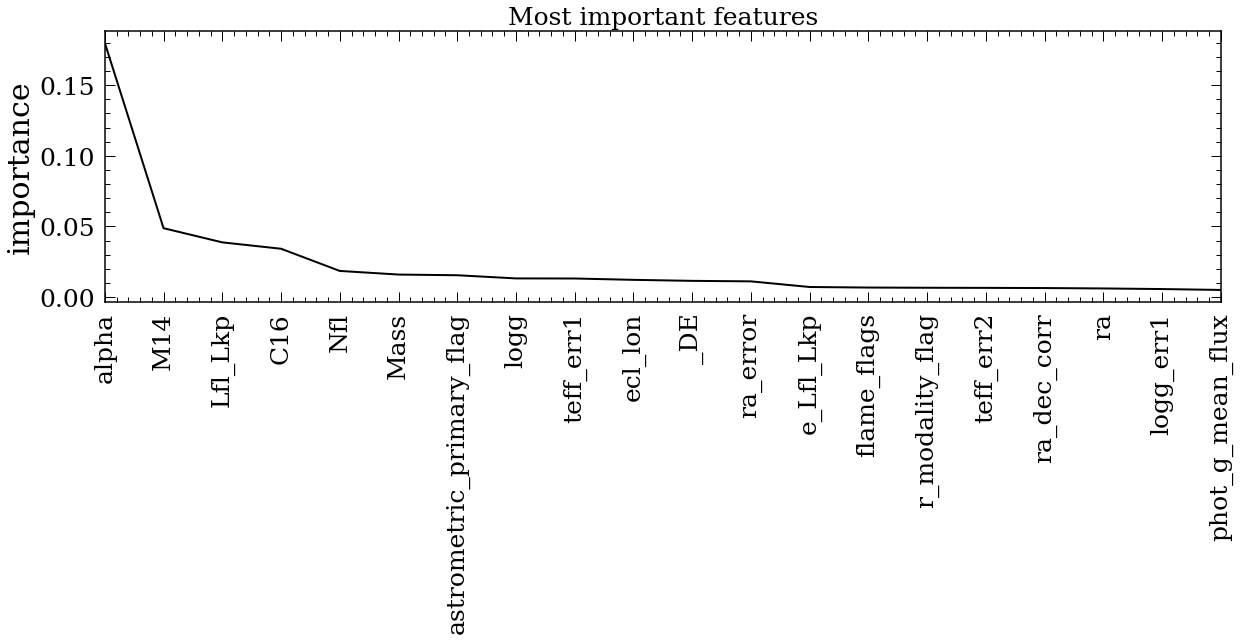

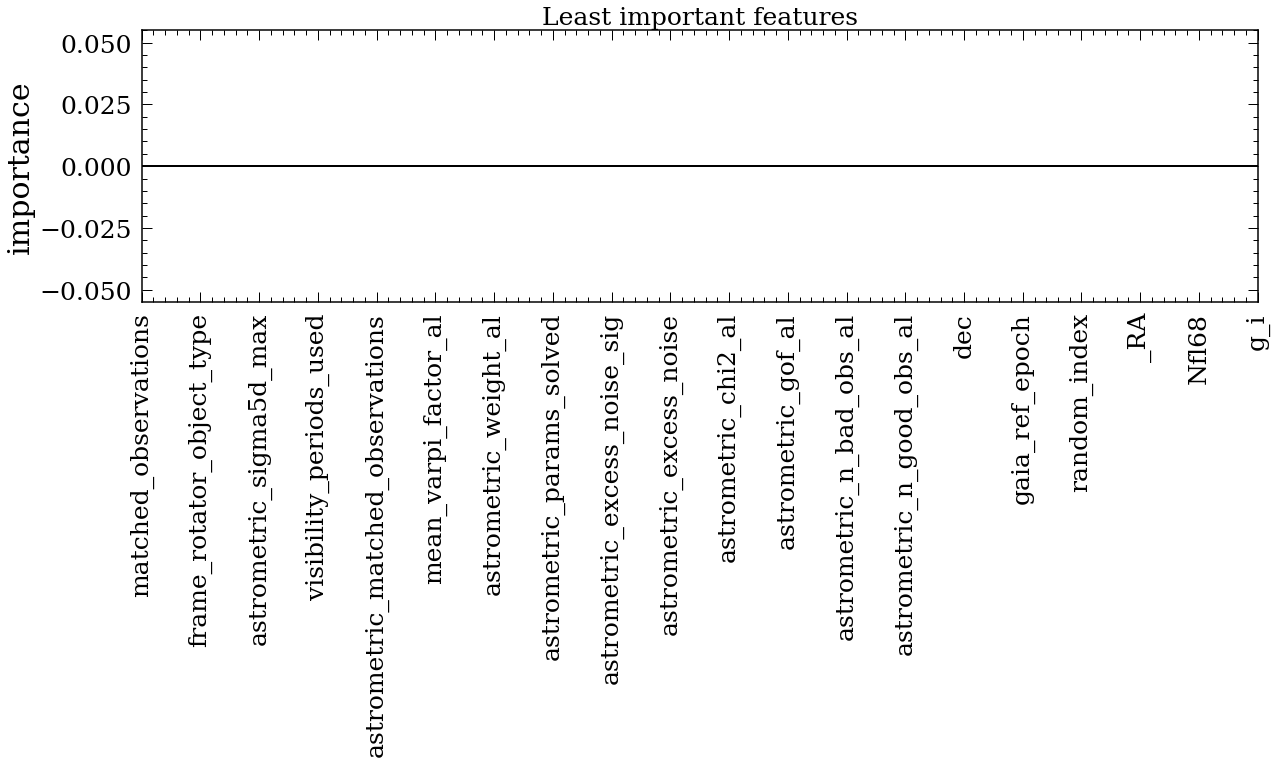

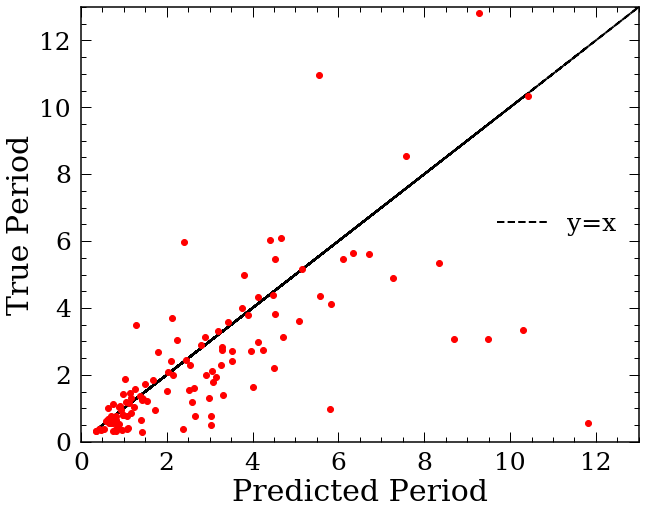

In [265]:
# zip the importance with its feature name
list1 = list(zip(actrualF,importance))
# sort the zipped list
decend=sorted(list1, key=lambda x:x[1])

# how many features to plot
topn=20 
x=range(topn)


####################  get most important features ############################################################
# get index and value for y
y_val=[decend[i][1] for i in range(len(decend)-topn,len(decend))]
my_xticks=[decend[i][0] for i in range(len(decend)-topn,len(decend))]

plt.figure(figsize=(20,5))
plt.title('Most important features',fontsize=25)
plt.xticks(x, my_xticks)
plt.plot(x, y_val,'k-')
plt.xlim([max(x),min(x)])
plt.xticks(rotation=90)
plt.ylabel('importance')
####################  get most important features ############################################################


####################  get least important features ############################################################
# get index and value for y
y_val=[decend[i][1] for i in range(topn)]
my_xticks=[decend[i][0] for i in range(topn)]

plt.figure(figsize=(20,5))
plt.title('Least important features',fontsize=25)
plt.xticks(x, my_xticks)
plt.plot(x, y_val,'k-')
plt.xlim([max(x),min(x)])
plt.xticks(rotation=90)
plt.ylabel('importance')
####################  get least important features ############################################################

# test... could probbaly put this part in my_randF function
diff=np.zeros([len(range(int(traind*featl)+1,featl)),1])
predictp=np.zeros([len(range(int(traind*featl)+1,featl)),1]) # predicted period
difc=0
for i in range(int(traind*featl)+1,featl):
    predictp[difc]=regr.predict([X[i,:]])
    diff[difc]=abs(predictp[difc]-y[i])/y[i]*100
    difc=difc+1
    
'''
# percentage error    
plt.figure(figsize=(10,5))
plt.plot(diff,'r.')
plt.ylim([0,100])
plt.ylabel('Error in percentage')
plt.xlabel('Prediction number')
'''

# prediction vs true
plt.figure(figsize=(10,8))
plt.plot(predictp,predictp,'k--',label='y=x')
plt.plot(predictp,y[int(traind*featl)+1:featl],'ro')
plt.xlabel('Predicted Period')
plt.ylabel('True Period')
plt.ylim([0,13])
plt.xlim([0,13])
plt.legend()
# guess M14 is playing a role of a constant offset?

# Some analysis of result ignorning M14 C19

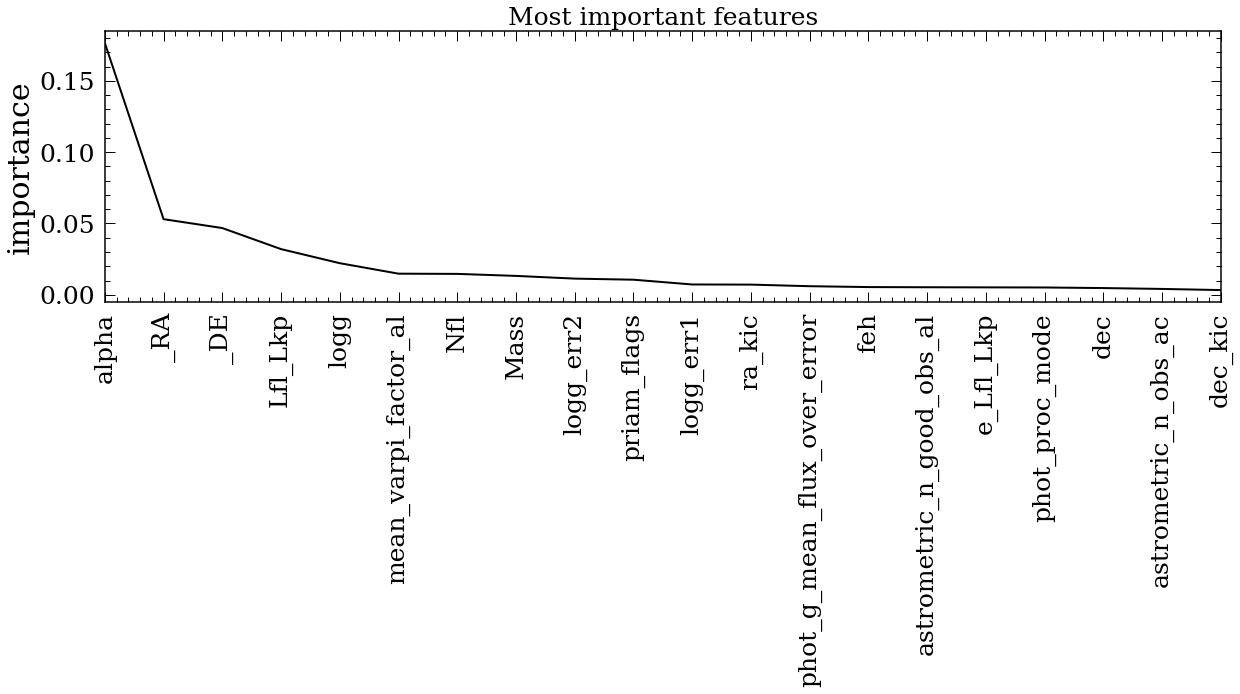

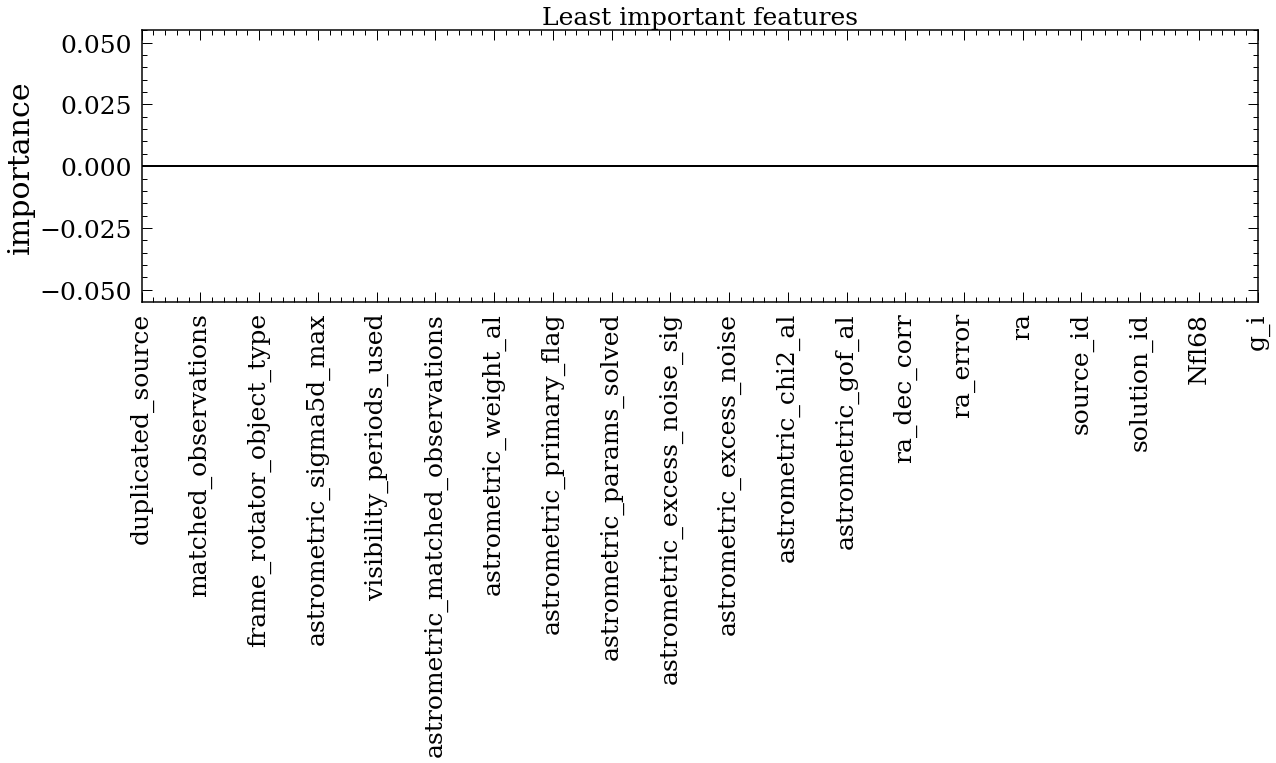

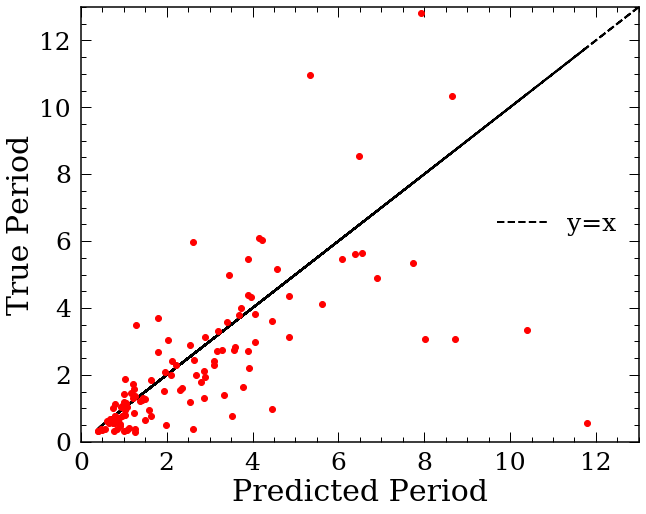

In [269]:
# zip the importance with its feature name
list1 = list(zip(actrualF_m,importance_m))

# sort the zipped list
decend=sorted(list1, key=lambda x:x[1])

# how many features to plot
topn=20 
x=range(topn)


####################  get most important features ############################################################
# get index and value for y
y_val=[decend[i][1] for i in range(len(decend)-topn,len(decend))] # value
my_xticks=[decend[i][0] for i in range(len(decend)-topn,len(decend))] # name

plt.figure(figsize=(20,5))
plt.title('Most important features',fontsize=25)
plt.xticks(x, my_xticks)
plt.plot(x, y_val,'k-')
plt.xlim([max(x),min(x)])
plt.xticks(rotation=90)
plt.ylabel('importance')
####################  get most important features ############################################################


####################  get least important features ############################################################
# get index and value for y
y_val=[decend[i][1] for i in range(topn)]
my_xticks=[decend[i][0] for i in range(topn)]

plt.figure(figsize=(20,5))
plt.title('Least important features',fontsize=25)
plt.xticks(x, my_xticks)
plt.plot(x, y_val,'k-')
plt.xlim([max(x),min(x)])
plt.xticks(rotation=90)
plt.ylabel('importance')
####################  get least important features ############################################################

# test... could probbaly put this part in my_randF function
diff_m=np.zeros([len(range(int(traind*featl)+1,featl)),1])
predictp_m=np.zeros([len(range(int(traind*featl)+1,featl)),1]) # predicted period
difc=0
for i in range(int(traind*featl)+1,featl):
    predictp_m[difc]=regr_m.predict([X[i,:]])
    diff_m[difc]=abs(predictp[difc]-y[i])/y[i]*100
    difc=difc+1

    
'''
# percentage error
plt.figure(figsize=(10,5))
plt.plot(diff,'r.')
plt.ylim([0,100])
plt.ylabel('Error in percentage')
plt.xlabel('Prediction number')
'''
# prediction vs true
plt.figure(figsize=(10,8))
plt.plot(predictp_m,predictp_m,'k--',label='y=x')
plt.plot(predictp_m,y[int(traind*featl)+1:featl],'ro')
plt.xlabel('Predicted Period')
plt.ylabel('True Period')
plt.ylim([0,13])
plt.xlim([0,13])
plt.legend()

# get featuers that has 0 importantce..

Get unimportant features and run again...

['Prot', 'M14', 'C16', 'g_i', 'Nfl68', 'solution_id', 'source_id', 'ra', 'ra_error', 'ra_dec_corr', 'astrometric_gof_al', 'astrometric_chi2_al', 'astrometric_excess_noise', 'astrometric_excess_noise_sig', 'astrometric_params_solved', 'astrometric_primary_flag', 'astrometric_weight_al', 'astrometric_matched_observations', 'visibility_periods_used', 'astrometric_sigma5d_max', 'frame_rotator_object_type', 'matched_observations', 'duplicated_source', 'phot_g_n_obs', 'phot_g_mean_flux', 'phot_g_mean_flux_error', 'flame_flags', 'kepid', 'kepmag', 'feh_err2', 'radius', 'radius_err1', 'radius_err2', 'mass_err1', 'mass_err2', 'nconfp', 'nkoi', 'ntce', 'hmag', 'kmag', 'kepler_gaia_ang_dist']


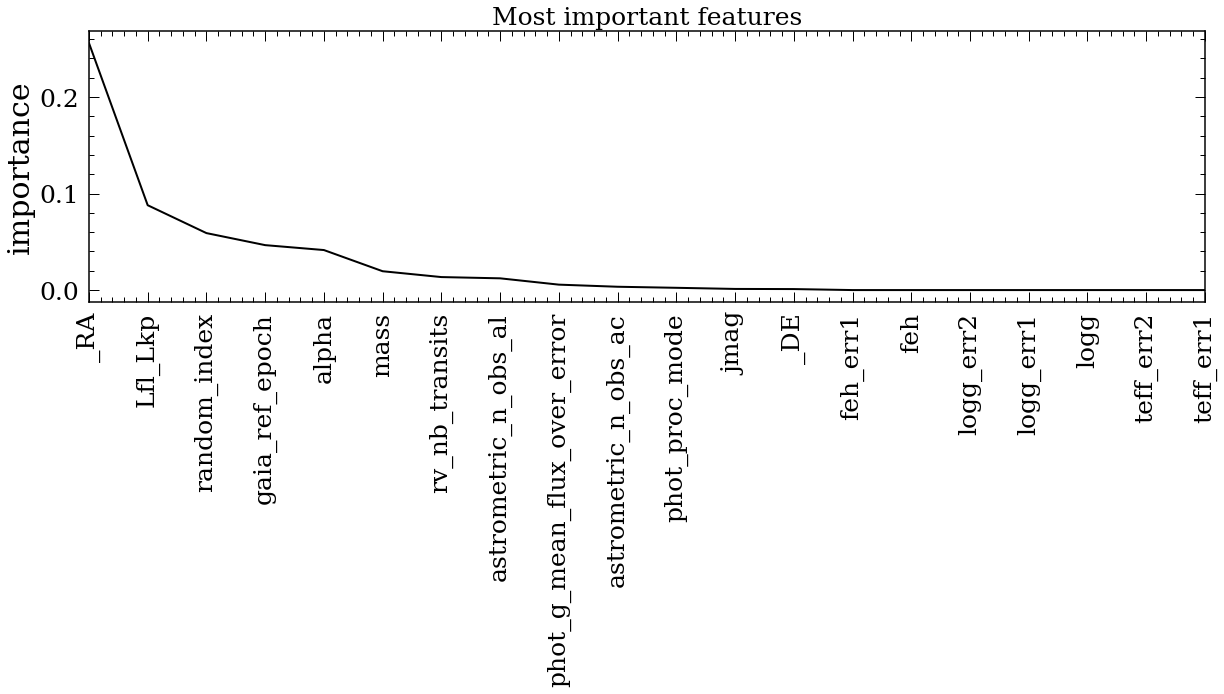

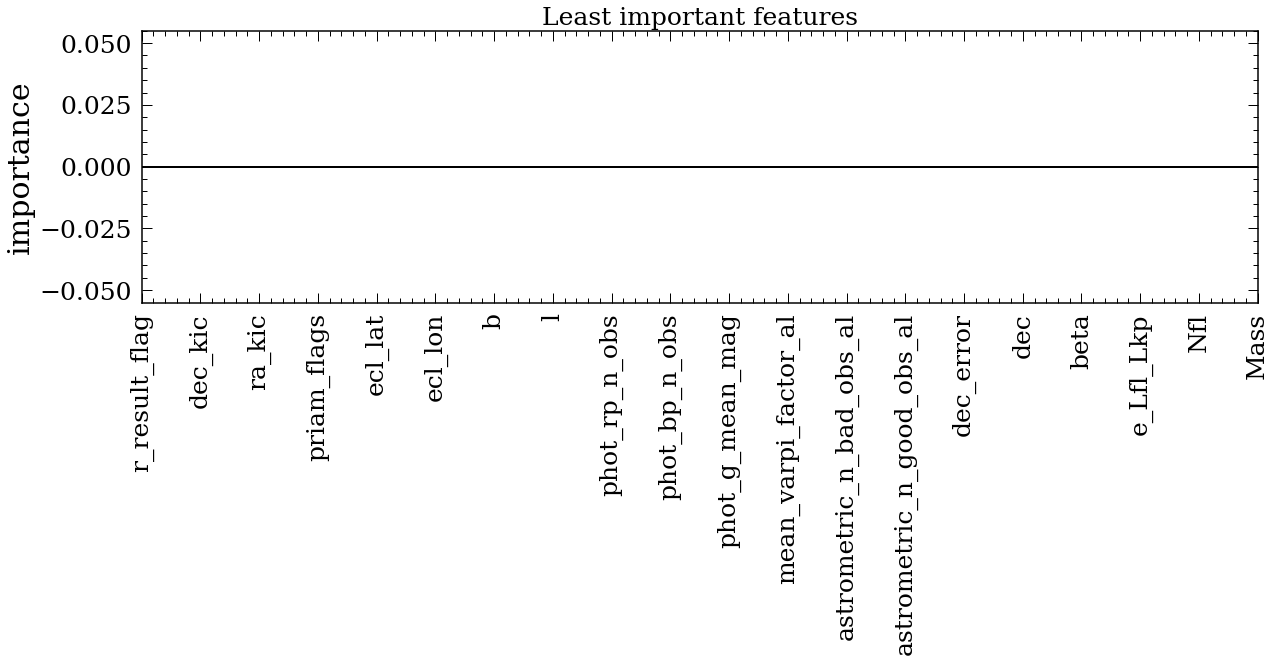

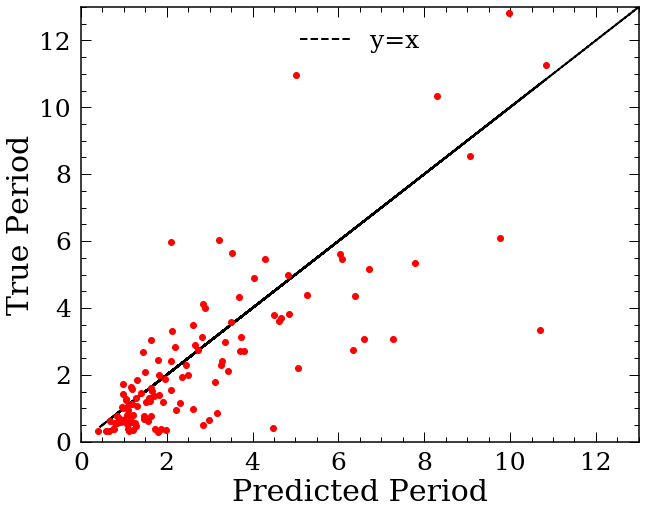

In [270]:
# get unimportant feasures
ignf_2=[]
for i in range(len(decend)):
    if decend[i][1]==0:
        ignf_2.append(decend[i][0])
#print(ignf_2)

flib_m_2,regr_m_2,importance_m_2,actrualF_m_2=my_randF_mask(df,traind,ignf_2)


# zip the importance with its feature name
list1 = list(zip(actrualF_m_2,importance_m_2))

# sort the zipped list
decend=sorted(list1, key=lambda x:x[1])

# how many features to plot
topn=20 
x=range(topn)


####################  get most important features ############################################################
# get index and value for y
y_val=[decend[i][1] for i in range(len(decend)-topn,len(decend))] # value
my_xticks=[decend[i][0] for i in range(len(decend)-topn,len(decend))] # name

plt.figure(figsize=(20,5))
plt.title('Most important features',fontsize=25)
plt.xticks(x, my_xticks)
plt.plot(x, y_val,'k-')
plt.xlim([max(x),min(x)])
plt.xticks(rotation=90)
plt.ylabel('importance')
####################  get most important features ############################################################


####################  get least important features ############################################################
# get index and value for y
y_val=[decend[i][1] for i in range(topn)]
my_xticks=[decend[i][0] for i in range(topn)]

plt.figure(figsize=(20,5))
plt.title('Least important features',fontsize=25)
plt.xticks(x, my_xticks)
plt.plot(x, y_val,'k-')
plt.xlim([max(x),min(x)])
plt.xticks(rotation=90)
plt.ylabel('importance')
####################  get least important features ############################################################

# test... could probbaly put this part in my_randF function
diff_m2=np.zeros([len(range(int(traind*featl)+1,featl)),1])
predictp_m2=np.zeros([len(range(int(traind*featl)+1,featl)),1]) # predicted period
difc=0
for i in range(int(traind*featl)+1,featl):
    predictp_m2[difc]=regr_m_2.predict([X[i,:]])
    diff_m2[difc]=abs(predictp[difc]-y[i])/y[i]*100
    difc=difc+1
    
# prediction vs true
plt.figure(figsize=(10,8))
plt.plot(predictp_m2,predictp_m2,'k--',label='y=x')
plt.plot(predictp_m2,y[int(traind*featl)+1:featl],'ro')
plt.xlabel('Predicted Period')
plt.ylabel('True Period')
plt.ylim([0,13])
plt.xlim([0,13])
plt.legend()

# get featuers that has 0 importantce..

Compare all prediction vs true for all methodes. Basically all the same.. 

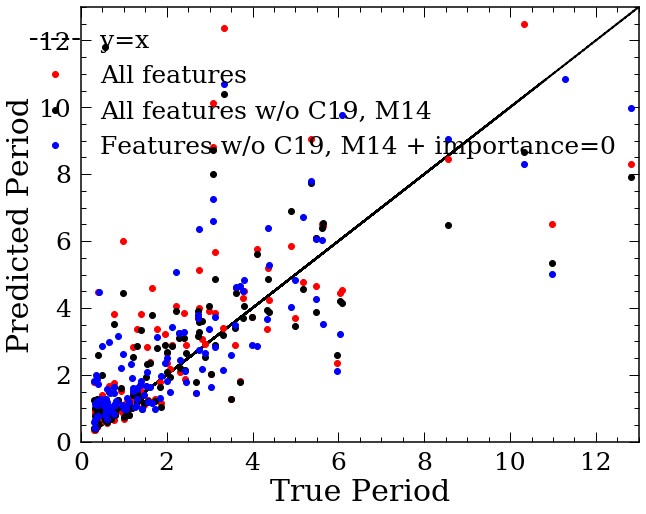

In [279]:
plt.figure(figsize=(10,8))
plt.plot(predictp_m2,predictp_m2,'k--',label='y=x')
plt.plot(y[int(traind*featl)+1:featl],predictp,'ro',label='All features')
plt.plot(y[int(traind*featl)+1:featl],predictp_m,'ko',label='All features w/o C19, M14')
plt.plot(y[int(traind*featl)+1:featl],predictp_m2,'bo',label='Features w/o C19, M14 + importance=0')
plt.ylabel('Predicted Period')
plt.xlabel('True Period')
plt.ylim([0,13])
plt.xlim([0,13])
plt.legend()

In [334]:
# just the same function
def my_randF_mask(df,traind,ignf_2=[]):
    ignf=['Prot','M14','C16']+ignf_2
    fl=len(df.columns) # how many features
    keys=range(fl)
    flib=dict(zip(keys, df.columns))

    featl=len(df.Prot) # feature length

    # initalize feature array
    X=np.zeros([featl,fl])

    actrualF=[] # actrual feature used
    # fill in feature array
    for i in range(1,fl):
        feature=df.iloc[:,i]
        # if input not string, not Prot and no NaN
        if (type(feature[0]) is not str) and (flib[i] not in ignf) and (not np.isnan(feature).any()):
            X[:,i]=feature
            actrualF.append(flib[i])

    # initalize normalized factor
    X_normalized = normalize(X, norm='l2')
    
    # output
    y=np.array(df.Prot)

    # run random forest
    regr = RandomForestRegressor(random_state=0,n_estimators=100,min_samples_leaf=0.04)
    regr.fit(X[0:int(traind*featl),:], y[0:int(traind*featl)])  

    # get the importance of each feature
    importance=regr.feature_importances_
    
    return flib,regr,importance,actrualF

flib_t,regr_t,importance_t,actrualF_t=my_randF_mask(df,traind)

# test... could probbaly put this part in my_randF function
diff_t=np.zeros([len(range(int(traind*featl)+1,featl)),1])
predictp_t=np.zeros([len(range(int(traind*featl)+1,featl)),1]) # predicted period
difc=0
for i in range(int(traind*featl)+1,featl):
    predictp_t[difc]=regr_t.predict([X[i,:]])
    diff_t[difc]=abs(predictp[difc]-y[i])/y[i]*100
    difc=difc+1

(0, 13)

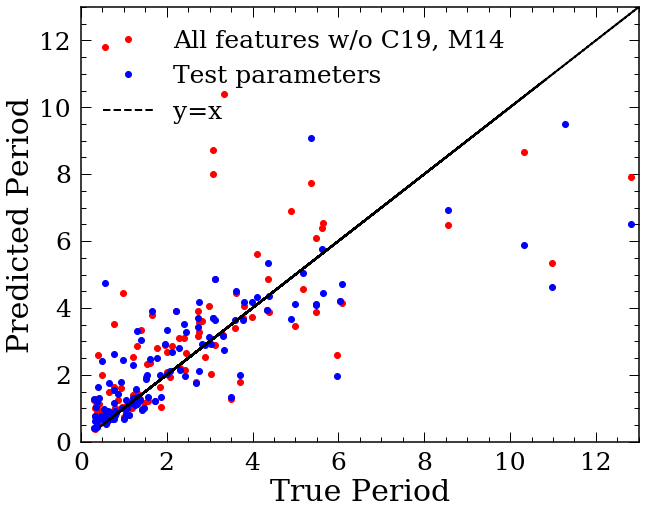

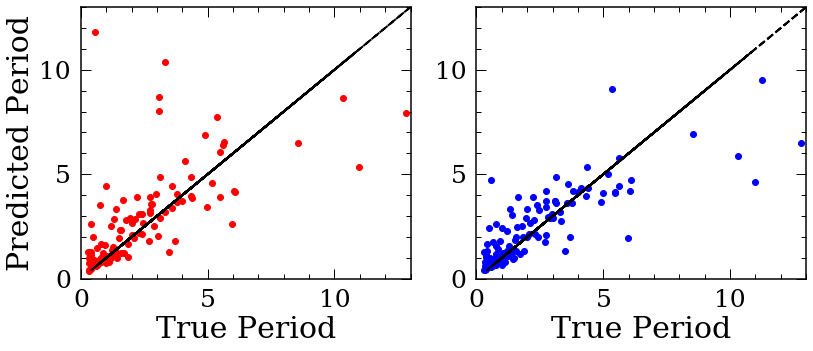

In [335]:
plt.figure(figsize=(10,8))
plt.plot(y[int(traind*featl)+1:featl],predictp_m,'ro',label='All features w/o C19, M14')
plt.plot(y[int(traind*featl)+1:featl],predictp_t,'bo',label='Test parameters')
plt.plot([0]+predictp_m2,[0]+predictp_m2,'k--',label='y=x')
plt.ylabel('Predicted Period')
plt.xlabel('True Period')
plt.ylim([0,13])
plt.xlim([0,13])
plt.legend()

plt.figure(figsize=(13,5))
plt.subplot(1,2,1)
plt.plot(y[int(traind*featl)+1:featl],predictp_m,'ro',label='All features w/o C19, M14')
plt.plot([0]+predictp_m2,[0]+predictp_m2,'k--',label='y=x')
plt.ylabel('Predicted Period')
plt.xlabel('True Period')
plt.ylim([0,13])
plt.xlim([0,13])
plt.subplot(1,2,2)
plt.plot(y[int(traind*featl)+1:featl],predictp_t,'bo',label='Test parameters')
plt.plot([0]+predictp_m2,[0]+predictp_m2,'k--',label='y=x')
plt.xlabel('True Period')
plt.ylim([0,13])
plt.xlim([0,13])

min_samples_split 2
min_samples_split 3
min_samples_split 4


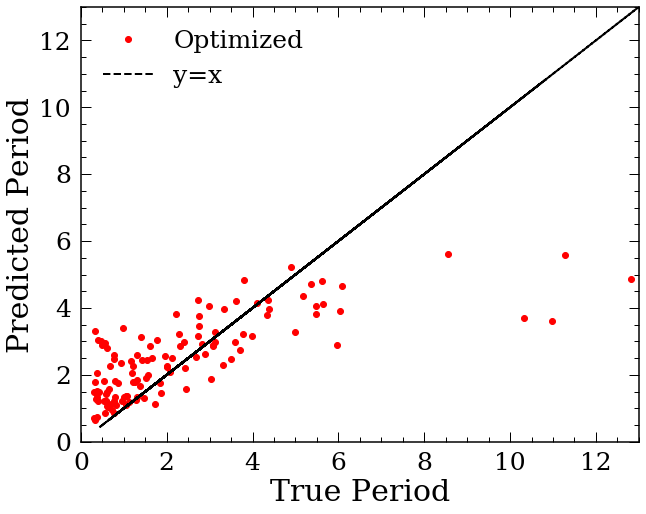

In [348]:
# outputs residual
def optRandF(df,traind,max_depth=None,min_samples_split=2,min_samples_leaf=1,min_weight_fraction_leaf=0,max_features='auto',max_leaf_nodes=None,min_impurity_decrease=0,ignf_2=[],outreg=0):
    ignf=['Prot','M14','C16']+ignf_2
    fl=len(df.columns) # how many features
    keys=range(fl)
    flib=dict(zip(keys, df.columns))

    featl=len(df.Prot) # feature length

    # initalize feature array
    X=np.zeros([featl,fl])

    actrualF=[] # actrual feature used
    # fill in feature array
    for i in range(1,fl):
        feature=df.iloc[:,i]
        # if input not string, not Prot and no NaN
        if (type(feature[0]) is not str) and (flib[i] not in ignf) and (not np.isnan(feature).any()):
            X[:,i]=feature
            actrualF.append(flib[i])

    # initalize normalized factor
    X_normalized = normalize(X, norm='l2')
    
    # output
    y=np.array(df.Prot)

    # run random forest
    regr = RandomForestRegressor(random_state=0,n_estimators=100,max_depth=max_depth,min_samples_split=min_samples_split,min_samples_leaf=min_samples_leaf,min_weight_fraction_leaf=min_weight_fraction_leaf,max_features=max_features,max_leaf_nodes=max_leaf_nodes,min_impurity_decrease=min_impurity_decrease)
    regr.fit(X[0:int(traind*featl),:], y[0:int(traind*featl)])  

    # get the importance of each feature
    importance=regr.feature_importances_
    
    # calculate midian stv
    # get predicted period
    predictp_t=np.zeros([len(range(int(traind*featl)+1,featl)),1]) # predicted period
    r2=np.zeros([len(range(int(traind*featl)+1,featl)),1]) # predicted period
    difc=0
    for i in range(int(traind*featl)+1,featl):
        predictp[difc]=regr.predict([X[i,:]])
        r2[difc]=((predictp[difc]-y[i])/predictp[difc])**2.
        difc=difc+1
    
    if outreg==0:
        return np.median(r2)
    else:
        return predictp

#max_depth_a=range(5,10)
min_samples_split_a=range(2,5)
min_samples_leaf_a=np.array([0.01*i for i in range(1,5)])
min_weight_fraction_leaf_a=np.array([0.05*i for i in range(1,5)])
max_features_a=np.array([0.05*i for i in range(1,5)])
#max_leaf_nodes_a=range(2,15)

#max_depth_o=max_depth_a[0]
min_samples_split_o=min_samples_split_a[0]
min_samples_leaf_o=min_samples_leaf_a[0]
min_weight_fraction_leaf_o=min_weight_fraction_leaf_a[0]
max_features_o=max_features_a[0]
#max_leaf_nodes_o=max_leaf_nodes_a[0]

r2o=optRandF(df,traind)
#for max_depth in max_depth_a:
    #print('max_depth',max_depth)
for min_samples_split in min_samples_split_a:
    print('min_samples_split',min_samples_split)
    for min_samples_leaf in min_samples_leaf_a:
        #print('min_samples_leaf',min_samples_leaf)
        for min_weight_fraction_leaf in min_weight_fraction_leaf_a:
            #print('min_weight_fraction_leaf',min_weight_fraction_leaf)
            for max_features in max_features_a:
                #print('max_features',max_features)
                #for max_leaf_nodes in max_leaf_nodes_a:
                r2=optRandF(df,traind,min_samples_split,min_samples_leaf,min_weight_fraction_leaf,max_features,ignf_2=[])
                if r2<r2o:
                    max_depth_o=max_depth
                    min_samples_split_o=min_samples_split
                    min_samples_leaf_o=min_samples_leaf
                    min_weight_fraction_leaf_o=min_weight_fraction_leaf
                    max_features_o=max_features
                    max_leaf_nodes_o=max_leaf_nodes
                    r2o=r2
                            
    
predict_b=optRandF(df,traind,max_depth_o,min_samples_split_o,min_samples_leaf_o,min_weight_fraction_leaf_o,max_features_o,outreg=1)

plt.figure(figsize=(10,8))
plt.plot(y[int(traind*featl)+1:featl],predict_b,'ro',label='Optimized')
plt.plot([0]+predictp_m2,[0]+predictp_m2,'k--',label='y=x')
plt.ylabel('Predicted Period')
plt.xlabel('True Period')
plt.ylim([0,13])
plt.xlim([0,13])
plt.legend()

# Testing using different fraction of data as training set

In [336]:
fraci=[0.1+0.1*i for i in range(8)] # fraction list
average_e=np.zeros([len(fraci),1])
counte=0
for i in fraci:
    print(i)
    flib,regr,importance,actrualF=my_randF(df,i)  
    diff=np.zeros([len(range(int(traind*i)+1,featl)),1])
    difc=0
    for j in range(int(traind*i)+1,featl):
        diff[difc]=abs((regr.predict([X[j,:]])-y[j])/y[j])*100
        difc=difc+1
    average_e[counte]=np.median(diff)
    counte=counte+1

0.1
0.2
0.30000000000000004
0.4
0.5
0.6
0.7000000000000001
0.8


Text(0.5, 0, 'Fraction used as training set')

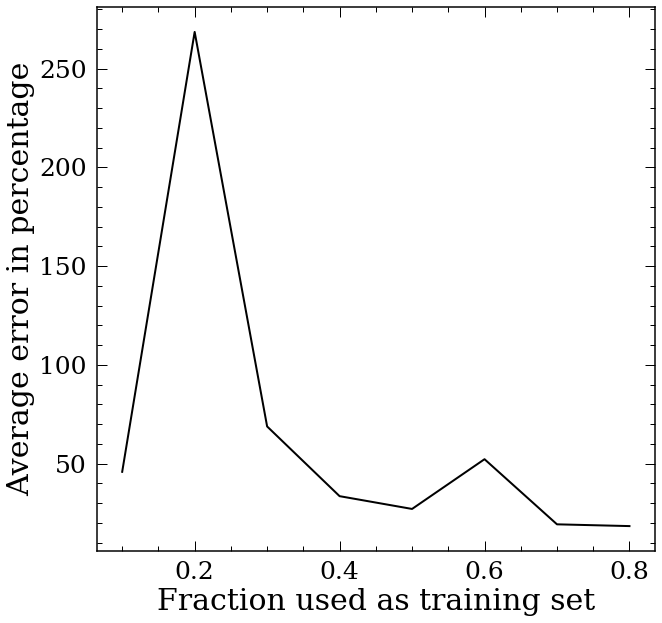

In [337]:
plt.plot(fraci,average_e,'k-')
plt.ylabel('Average error in percentage')
plt.xlabel('Fraction used as training set')

Tune parameters
Compare to linear
Apply to TESS

Get features (velocity)